In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
import os

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [7]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
print(train.shape)
train.head()

(28605391, 41)


,ID,Click,F01,F02,F03,F04,F05,F06,F07,F08,...,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39
0,TRAIN_00000000,1,NSLHFNS,AVKQTCL,DTZFPRW,114.0,ISVXFVA,1,PQZBVMG,LPYPUNA,...,NZGEZLW,GTISJWW,380.0,2.0,AXQFZWC,IRUDRFB,NaN,TFJMLCZ,0.0,AURZYDY
1,TRAIN_00000001,0,VGIVWZQ,LSUSMVO,PQGWFJZ,26.0,NFRVLWS,43,IMPIGJT,MIGYEEG,...,NZGEZLW,GTISJWW,466.0,1.0,DRVVDHZ,IRUDRFB,19.0,AUGTURV,0.0,LUZRMLU
2,TRAIN_00000002,0,JCDXFYU,PILDDJU,IAGJDOH,119.0,LFPUEOV,0,FFUTIRZ,OFKQGTY,...,VHXETCF,KHZNEZF,197.0,0.0,QMOULXS,IRUDRFB,8.0,ZVSTLNM,0.0,MHBRSQK
3,TRAIN_00000003,1,PSMFWTP,ZYAVJHP,NaN,15.0,ATQPZSJ,26,ZDTZNSB,THBWWCD,...,IVIRTPR,GTISJWW,8640.0,0.0,IZLJUJS,IRUDRFB,14.0,ZBSRLCQ,0.0,GAZBSSZ
4,TRAIN_00000004,0,SLCRICD,QPQWGXA,NaN,13.0,CHZGJZR,20,PQZBVMG,MIGYEEG,...,NZGEZLW,WHSRKIM,41774.0,0.0,BHBIZCL,IRUDRFB,13.0,QHYLSBX,0.0,QTATWAY


### Data Processing.

#### Handling Missing Values

In [ ]:
def missing_value_table(df):
    # Total missing_values
    mis_val = df.isnull().sum()
    
    # percentage of missing values
    mis_val_percent = 100 * (mis_val / len(df))
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns =mis_val_table.rename(
        columns= {0: 'Missing Values', 1: " % of Total Values"}
    )
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(' % of Total Values', ascending=False).round(1)
    
    
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0])+
          " columns that have missing values")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
train_missing = missing_value_table(train)
train_missing

Your selected dataframe has 42 columns.
There are 21 columns that have missing values


,Missing Values,% of Total Values
F27,4757410,38.7
F29,4757410,38.7
F03,4530790,36.8
F15,4530790,36.8
F20,4530790,36.8
F26,4530790,36.8
F24,3881375,31.6
F36,3124431,25.4
F18,3124431,25.4
F04,2463948,20.0


In [ ]:
test_missing = missing_value_table(test)
test_missing

Your selected dataframe has 40 columns.
There are 21 columns that have missing values


,Missing Values,% of Total Values
F27,1731836,38.2
F29,1731836,38.2
F03,1606686,35.4
F15,1606686,35.4
F20,1606686,35.4
F26,1606686,35.4
F24,1450742,32.0
F36,1185646,26.1
F18,1185646,26.1
F04,910130,20.1


In [ ]:
train_missing_dict = {}
test_missing_dict = {}

In [ ]:
train_missing_dict['high'] =train_missing[train_missing[' % of Total Values'] >= 30].index.tolist()
test_missing_dict['high'] = test_missing[test_missing[' % of Total Values'] >= 30].index.tolist()

In [ ]:
train_missing_dict['median'] = train_missing[(train_missing[' % of Total Values'] >= 10) & (train_missing[' % of Total Values'] < 30)].index.tolist()
test_missing_dict['median'] = test_missing[(test_missing[' % of Total Values'] >= 10) & (test_missing[' % of Total Values'] < 30)].index.tolist()

In [ ]:
train_missing_dict['low'] = train_missing[train_missing[' % of Total Values'] < 10].index.tolist()
test_missing_dict['low'] = test_missing[test_missing[' % of Total Values'] < 10].index.tolist()

In [ ]:
train_missing_dict

{'high': ['F27', 'F29', 'F03', 'F15', 'F20', 'F26', 'F24'],
 'median': ['F36', 'F18', 'F04', 'F11'],
 'low': ['F19', 'F33', 'F34', 'F01', 'F02', 'F12', 'F10', 'F05', 'F38', 'F32']}

In [ ]:
test_missing_dict

{'high': ['F27', 'F29', 'F03', 'F15', 'F20', 'F26', 'F24'],
 'median': ['F36', 'F18', 'F04', 'F19', 'F33', 'F11'],
 'low': ['F34', 'F01', 'F02', 'F12', 'F10', 'F05', 'F38', 'F32']}

In [8]:
train_eda = train.drop(['ID', 'Click'], axis=1).copy()

In [9]:
num_cols = train_eda.select_dtypes('number').columns.tolist()
obj_cols = train_eda.select_dtypes('object').columns.tolist()

In [10]:
for col in num_cols:
    train_eda[col] = train_eda[col].fillna(0)
    test[col] = test[col].fillna(0)

In [11]:
for col in obj_cols:
    train_eda[col] = train_eda[col].fillna('NaN')
    test[col] = test[col].fillna('NaN')

In [12]:
train_eda.isnull().sum()

F01    0
F02    0
F03    0
F04    0
F05    0
F06    0
F07    0
F08    0
F09    0
F10    0
F11    0
F12    0
F13    0
F14    0
F15    0
F16    0
F17    0
F18    0
F19    0
F20    0
F21    0
F22    0
F23    0
F24    0
F25    0
F26    0
F27    0
F28    0
F29    0
F30    0
F31    0
F32    0
F33    0
F34    0
F35    0
F36    0
F37    0
F38    0
F39    0
dtype: int64

In [13]:
test.isnull().sum()

ID     0
F01    0
F02    0
F03    0
F04    0
F05    0
F06    0
F07    0
F08    0
F09    0
F10    0
F11    0
F12    0
F13    0
F14    0
F15    0
F16    0
F17    0
F18    0
F19    0
F20    0
F21    0
F22    0
F23    0
F24    0
F25    0
F26    0
F27    0
F28    0
F29    0
F30    0
F31    0
F32    0
F33    0
F34    0
F35    0
F36    0
F37    0
F38    0
F39    0
dtype: int64

In [24]:
# Part 1 isnull columns : 01, 02, 03(high)
train_eda[["F01", "F02", "F03"]].value_counts()

F01      F02      F03    
JCDXFYU  PILDDJU  IAGJDOH    2588736
LLKAVMO  EKJSVRG  NaN        1105020
VNOHLIR  PKLDGLX  IAGJDOH     210754
XOZOJFY  RTRPFPH  IAGJDOH     202101
NaN      NaN      NaN         179180
                              ...   
JKGQAOO  VVBZFTT  UKXCUGQ          1
JKGPXRR  PCDVMZC  NaN              1
JKGPTBL  TPUSZQU  XBNQTKI          1
                  KVMAIVS          1
ZZZZXXY  OIMPZYF  DTZFPRW          1
Length: 2312721, dtype: int64

In [51]:
part_1 = train_eda['F01'].str[:] + train_eda['F02'].str[:] + train_eda['F03'].str[:]

In [62]:
part_1.value_counts()

JCDXFYUPILDDJUIAGJDOH    2588736
LLKAVMOEKJSVRGNaN        1105020
VNOHLIRPKLDGLXIAGJDOH     210754
XOZOJFYRTRPFPHIAGJDOH     202101
NaNNaNNaN                 179180
                          ...   
XGKPGHTLQCOILQDTZFPRW          1
VFWERUZMWOLSOXDTZFPRW          1
GHUUKRZNKFBXNCKFOPSGX          1
MFPWGYAVBESRFWDTZFPRW          1
BUIMLCERFDGNNDNaN              1
Length: 2312721, dtype: int64

In [26]:
train_eda['F05'].value_counts()

LFPUEOV    2588736
YKHABYT    1105017
NaN         520550
EVTUBMN     210754
GOUWEUZ     202101
            ...   
OONDCVH          1
EMVOCES          1
SOWZKGB          1
LKQGKCT          1
JHCOBIH          1
Name: F05, Length: 2476487, dtype: int64

In [27]:
# Part 3 isnull columns : 10
train_eda[["F07", "F08", "F09", "F10"]].value_counts()

F07      F08      F09      F10    
PQZBVMG  FTPHMPQ  BEZTQIO  YLKUVQA    39138
                  OBHSTVT  YLKUVQA    34793
                  GPGUVJE  YLKUVQA    25095
         LPYPUNA  OBHSTVT  YLKUVQA    24498
         FTPHMPQ  LEGVDRN  YLKUVQA    15642
                                      ...  
JWRXYEU  FTPHMPQ  YHZDCGL  EHFNKMU        1
JWRVQES  ZTHDEFA  RRAHOZE  AYDYJRT        1
         VAWXMCR  ZQSWDVW  LHLIKLC        1
                  YGHMFTN  GBBPBCO        1
NXHMPAO  FTPHMPQ  BRWKPOU  UWLWRJV        1
Length: 5597352, dtype: int64

In [53]:
part_2 = train_eda['F07'].str[:] + train_eda['F08'].str[:] + train_eda["F09"].str[:] + train_eda['F10'].str[:]

In [28]:
# Part 4 isnull column : 12
train_eda[["F12", "F13"]].value_counts()

F12      F13    
RDDXPRS  DBXROKY    783857
MGRUYII  KGJACUM    533337
         GTQXVZY    523947
RDDXPRS  YJHOJQA    321163
GVLNEFD  FAOIKNL    206304
                     ...  
JKLANZG  IWLCEBZ         1
JKLAIIC  IFVJFMQ         1
JKLAFQR  CKYZOJS         1
JKLAFCE  SMRBWMU         1
ZZZZZOW  VEPNXII         1
Length: 2241779, dtype: int64

In [54]:
part_3 = train_eda['F12'].str[:] + train_eda['F13'].str[:]

In [29]:
train_eda[["F15", "F16", "F17"]].value_counts()

F15      F16      F17    
ZNLREKK  OLYJVSW  ORHLUGM    41324
NaN      RMZRTTM  ZSBOVQM    39389
         VZSPRHD  ZSBOVQM    35484
                  ORHLUGM    29330
         RDDFWHY  ZSBOVQM    25310
                             ...  
ZNLREKK  KMXMTFJ  QANMWXR        1
ZHOLRQX  PQVUOVK  SXZLOWA        1
NaN      SEGVCCA  ZSBOVQM        1
NGMRRQG  TJEUHLS  FMJARXS        1
ZHOLRQX  DOKTARS  QANMWXR        1
Length: 221256, dtype: int64

In [55]:
part_4 = train_eda['F15'].str[:] + train_eda['F16'].str[:] + train_eda['F17'].str[:]

In [30]:
train_eda[["F20", "F21", "F22", "F23"]].value_counts()

F20      F21      F22      F23    
TGVLSYT  FUZMWEL  SNDDHSM  IDHAIQQ    361489
NaN      BUUUKVW  SNDDHSM  IDHAIQQ    303761
TGVLSYT  FUZMWEL  MCGNYVX  IDHAIQQ    158749
NaN      BUUUKVW  MCGNYVX  IDHAIQQ    134399
         LBABTIR  SNDDHSM  IDHAIQQ    120393
                                       ...  
KAVHOSV  BUUUKVW  QVRVKUM  VTYMMMX         1
                  QSXSZPK  YBUJRVR         1
                           DWCBOJI         1
                  QPUTSWE  IZDGSXJ         1
ZZZWURH  YBGYGNW  SNDDHSM  TVJSYDC         1
Length: 2346572, dtype: int64

In [56]:
part_5 = train_eda['F20'].str[:] + train_eda['F21'].str[:] + train_eda['F22'].str[:] + train_eda['F23'].str[:]

In [31]:
train_eda[["F25", "F26"]].value_counts()

F25      F26    
BPCPMTT  NaN        110865
ADNJETQ  NaN         90410
JEISAYE  WVRHGBC     86298
KUCXSMU  NaN         79337
HAHOEIU  WVRHGBC     79141
                     ...  
KZEAINA  XLEOMYL         1
         XGFWSYO         1
         XFUHRFN         1
         XFBIKRY         1
NFZOKNT  BUWDIBR         1
Length: 555559, dtype: int64

In [57]:
part_6 = train_eda['F25'].str[:]+train_eda['F26'].str[:]

In [32]:
train_eda['F28'].value_counts()

YYEFTXW    5905215
MAVCFCM    1353463
RSJLBWR    1105308
YBZKRWS     882897
VNBXRYV     879868
IYZTLFQ     829191
QJTGLTY     460849
STJSBJK     444941
YQCIJMD     216026
WELVRCP     100526
YNMNIGT      30086
TPWYCEJ      26078
SESONPM      22211
GOXHGND      19787
PNHBRGL      10922
EEPFAVL       5319
UCZULOL       2259
TZLWFLV       1657
GQIUEKY       1092
LCOONAU        922
CJNDQDO        396
BTIRDSR        283
GZRZRNM        118
UZGUIRI         80
UKUPUNG         62
FRDZXOL         55
ZREDNJU         50
AJXEHDB         46
NFDIXOR         41
TDMLCIH         37
TERWTNV         36
YDAWBHD         27
PHQOAUH         23
HWGLMSC         18
JUZISUA         18
LNYZIJI         14
TLZJZTX         13
ITQPQCE         11
MOMLPCS         11
ZWCARNG         10
YNYRPNN          6
KLQVFKQ          5
KERNDVB          4
RBYASAV          4
FZXQUWH          4
KRMTJNQ          4
KTQSTGS          2
LOKAMZQ          1
GIFBFJY          1
ZEWAAPW          1
GEBVXUS          1
DFFQGCN          1
Name: F28, d

In [33]:
train_eda[["F30", "F31"]].value_counts()

F30      F31    
NZGEZLW  GTISJWW    1375127
SLXYBBG  GTISJWW     665022
NZGEZLW  KHZNEZF     534808
MFPUCBU  GTISJWW     418250
FGOVFJM  GTISJWW     305308
                     ...   
KBTSNZD  AZZYLIF          1
TWCUWDK  AZZYLIF          1
KBTGHSA  WHSRKIM          1
         WCMLPDK          1
AABIFCJ  AZZYLIF          1
Length: 151592, dtype: int64

In [58]:
part_7 = train_eda['F30'].str[:] + train_eda['F31'].str[:]

In [34]:
train_eda[["F34", "F35"]].value_counts()

F34      F35    
QMOULXS  IRUDRFB    2400404
ABEHJLN  IRUDRFB     973163
NaN      IRUDRFB     452274
QMOULXS  MNBSNJV     188295
SHMKPOR  IRUDRFB     182545
                     ...   
JPEPGCF  IRUDRFB          1
JPEPCWD  IRUDRFB          1
JPEPCCL  IRUDRFB          1
JPEOISK  IRUDRFB          1
ZZZZZOU  MNBSNJV          1
Length: 1649905, dtype: int64

In [59]:
part_8 = train_eda['F34'].str[:] + train_eda['F35'].str[:]

In [35]:
train_eda[["F37"]].value_counts()

F37    
XBKBHCW    506266
ZVSTLNM    493979
TFJMLCZ    384810
KTCQCEU    301825
AUGTURV    223381
            ...  
FVCZFNC         1
EENVWDD         1
RSRJIYR         1
FVLZXYG         1
WVJFWBX         1
Length: 8820, dtype: int64

In [14]:
def partial(df):
    part_1 = df['F01'].str[:] + df['F02'].str[:] + df['F03'].str[:]
    part_2 = df['F07'].str[:] + df['F08'].str[:] + df["F09"].str[:] + df['F10'].str[:]
    part_3 = df['F12'].str[:] + df['F13'].str[:]
    part_4 = df['F15'].str[:] + df['F16'].str[:] + df['F17'].str[:]
    part_5 = df['F20'].str[:] + df['F21'].str[:] + df['F22'].str[:] + df['F23'].str[:]
    part_6 = df['F25'].str[:]+df['F26'].str[:]
    part_7 = df['F30'].str[:] + df['F31'].str[:]
    part_8 = df['F34'].str[:] + df['F35'].str[:]
    
    dervie_category = {1:part_1, 2:part_2, 3:part_3,
                       4:part_4, 5:part_5, 6:part_6,
                       7:part_7, 8:part_8}

    df_dervie = pd.DataFrame(dervie_category)
    return df_dervie

### Make dervie category

In [15]:
df_dervie = partial(train_eda)
df_dervie.head()

,1,2,3,4,5,6,7,8
0,NSLHFNSAVKQTCLDTZFPRW,PQZBVMGLPYPUNAIZYJZDARANQNXO,EGWPZEBSMRBWMU,NGMRRQGNLHSWSRSXZLOWA,LTCDFSXSWAZXZYSNDDHSMIDHAIQQ,HLADEESXAUNDQW,NZGEZLWGTISJWW,AXQFZWCIRUDRFB
1,VGIVWZQLSUSMVOPQGWFJZ,IMPIGJTMIGYEEGNGODWINGBQMJYF,OUPRLWNQVLCQTS,ZHOLRQXDGLEHCIZSBOVQM,QAOROGGBUUUKVWSNDDHSMIDHAIQQ,TPNEYOYBUWDIBR,NZGEZLWGTISJWW,DRVVDHZIRUDRFB
2,JCDXFYUPILDDJUIAGJDOH,FFUTIRZOFKQGTYBEZTQIOYLKUVQA,MGRUYIIKGJACUM,ZNLREKKPBCDAMRTEHYADQ,TGVLSYTFUZMWELSNDDHSMZXHXBZQ,YMGUAHKWVRHGBC,VHXETCFKHZNEZF,QMOULXSIRUDRFB
3,PSMFWTPZYAVJHPNaN,ZDTZNSBTHBWWCDLTETYBGGEKHGQZ,OPGPVBHUMIEGWH,NaNWDTKLCQSXZLOWA,NaNBJAYVHNSNDDHSMVTYMMMX,IROGIOWNaN,IVIRTPRGTISJWW,IZLJUJSIRUDRFB
4,SLCRICDQPQWGXANaN,PQZBVMGMIGYEEGLJBQPJWSOKLCDW,LHVQODUYJFFIGH,NaNNRRIGTNTEHYADQ,NaNLBABTIRNXBZHKDIZDGSXJ,PWGXQTBNaN,NZGEZLWWHSRKIM,BHBIZCLIRUDRFB


In [16]:
test_dervie = partial(test)
test_dervie.head()

,1,2,3,4,5,6,7,8
0,NaNNaNIAGJDOH,WBNHHNSMIGYEEGNENNAGQNaN,NaNWIFNKKO,ZNLREKKEODYCTFSXZLOWA,PLEMRSPBUUUKVWSETKQUUIDHAIQQ,AXFWWIRWVRHGBC,MFPUCBUGTISJWW,NaNIRUDRFB
1,SDVLQIDVDDLZCRDTZFPRW,OWLMRBRMIGYEEGUKFZEADPUSHPSV,OQCPKNUCNNPQRG,NGMRRQGKFXBFJVSXZLOWA,OZWSWULBUUUKVWAYWZSUEVTYMMMX,FZYNKNGYYQVFBZ,NZGEZLWGTISJWW,ORGHLQNIRUDRFB
2,XXQINZYAXQDKZDIAGJDOH,ILCWUTMLPYPUNANENNAGQQSZWOEN,EMUZCLWWIFNKKO,ZNLREKKARYIYOUSXZLOWA,PLEMRSPBUUUKVWIXRBBLWZXHXBZQ,VPJVVZFWVRHGBC,VHXETCFGTISJWW,WRRYBLOIRUDRFB
3,JCDXFYUPILDDJUIAGJDOH,HUHNWCJFTPHMPQFPCZMEOYLKUVQA,MGRUYIIDZGASMB,ZNLREKKMDMTXEQORHLUGM,TGVLSYTFUZMWELSOCVOBYIDHAIQQ,XPENUAXWVRHGBC,NZGEZLWKHZNEZF,QMOULXSIRUDRFB
4,DZPQPXKHKSCOJFNaN,CFQLINNFTPHMPQYOPLVLNZQEBKKM,SIWUVDCAKOONVA,NaNZLKSVOWQANMWXR,NaNBUUUKVWSNDDHSMMZNWJWI,XPENUAXNaN,FGOVFJMWCPHYPZ,WZAQBGEIRUDRFB


In [17]:
def convert_value_counts(df, column):
    return df[column].value_counts()

In [18]:
for i in range(1, 9):
    value_counts = convert_value_counts(df_dervie, i)
    print(f"Processing {i}")
    df_dervie[f'part_{i}'] = df_dervie[i].map(value_counts)
    test_dervie[f'part_{i}'] = test_dervie[i].map(value_counts)

Processing 1
Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8


In [19]:
df_dervie.head()

,1,2,3,4,5,6,7,8,part_1,part_2,part_3,part_4,part_5,part_6,part_7,part_8
0,NSLHFNSAVKQTCLDTZFPRW,PQZBVMGLPYPUNAIZYJZDARANQNXO,EGWPZEBSMRBWMU,NGMRRQGNLHSWSRSXZLOWA,LTCDFSXSWAZXZYSNDDHSMIDHAIQQ,HLADEESXAUNDQW,NZGEZLWGTISJWW,AXQFZWCIRUDRFB,1,1,1,83,4,1,3247557,1
1,VGIVWZQLSUSMVOPQGWFJZ,IMPIGJTMIGYEEGNGODWINGBQMJYF,OUPRLWNQVLCQTS,ZHOLRQXDGLEHCIZSBOVQM,QAOROGGBUUUKVWSNDDHSMIDHAIQQ,TPNEYOYBUWDIBR,NZGEZLWGTISJWW,DRVVDHZIRUDRFB,885,3,754,153,269,6,3247557,1012
2,JCDXFYUPILDDJUIAGJDOH,FFUTIRZOFKQGTYBEZTQIOYLKUVQA,MGRUYIIKGJACUM,ZNLREKKPBCDAMRTEHYADQ,TGVLSYTFUZMWELSNDDHSMZXHXBZQ,YMGUAHKWVRHGBC,VHXETCFKHZNEZF,QMOULXSIRUDRFB,5878229,14,1212284,1351,136400,34825,33410,5489311
3,PSMFWTPZYAVJHPNaN,ZDTZNSBTHBWWCDLTETYBGGEKHGQZ,OPGPVBHUMIEGWH,NaNWDTKLCQSXZLOWA,NaNBJAYVHNSNDDHSMVTYMMMX,IROGIOWNaN,IVIRTPRGTISJWW,IZLJUJSIRUDRFB,14800,5,14800,289,15453,3436,79943,23915
4,SLCRICDQPQWGXANaN,PQZBVMGMIGYEEGLJBQPJWSOKLCDW,LHVQODUYJFFIGH,NaNNRRIGTNTEHYADQ,NaNLBABTIRNXBZHKDIZDGSXJ,PWGXQTBNaN,NZGEZLWWHSRKIM,BHBIZCLIRUDRFB,8,8,648,33,249,5962,189531,1769


In [20]:
test_dervie.head()

,1,2,3,4,5,6,7,8,part_1,part_2,part_3,part_4,part_5,part_6,part_7,part_8
0,NaNNaNIAGJDOH,WBNHHNSMIGYEEGNENNAGQNaN,NaNWIFNKKO,ZNLREKKEODYCTFSXZLOWA,PLEMRSPBUUUKVWSETKQUUIDHAIQQ,AXFWWIRWVRHGBC,MFPUCBUGTISJWW,NaNIRUDRFB,209654.0,2.0,343.0,565.0,7.0,3036.0,985378.0,1077942.0
1,SDVLQIDVDDLZCRDTZFPRW,OWLMRBRMIGYEEGUKFZEADPUSHPSV,OQCPKNUCNNPQRG,NGMRRQGKFXBFJVSXZLOWA,OZWSWULBUUUKVWAYWZSUEVTYMMMX,FZYNKNGYYQVFBZ,NZGEZLWGTISJWW,ORGHLQNIRUDRFB,NaN,NaN,NaN,116.0,NaN,544.0,3247557.0,NaN
2,XXQINZYAXQDKZDIAGJDOH,ILCWUTMLPYPUNANENNAGQQSZWOEN,EMUZCLWWIFNKKO,ZNLREKKARYIYOUSXZLOWA,PLEMRSPBUUUKVWIXRBBLWZXHXBZQ,VPJVVZFWVRHGBC,VHXETCFGTISJWW,WRRYBLOIRUDRFB,371.0,NaN,369.0,677.0,NaN,2825.0,90436.0,286.0
3,JCDXFYUPILDDJUIAGJDOH,HUHNWCJFTPHMPQFPCZMEOYLKUVQA,MGRUYIIDZGASMB,ZNLREKKMDMTXEQORHLUGM,TGVLSYTFUZMWELSOCVOBYIDHAIQQ,XPENUAXWVRHGBC,NZGEZLWKHZNEZF,QMOULXSIRUDRFB,5878229.0,95.0,298105.0,7768.0,108067.0,21556.0,1213645.0,5489311.0
4,DZPQPXKHKSCOJFNaN,CFQLINNFTPHMPQYOPLVLNZQEBKKM,SIWUVDCAKOONVA,NaNZLKSVOWQANMWXR,NaNBUUUKVWSNDDHSMMZNWJWI,XPENUAXNaN,FGOVFJMWCPHYPZ,WZAQBGEIRUDRFB,23817.0,11.0,23817.0,1699.0,47802.0,13560.0,31922.0,22782.0


In [21]:
test_dervie = test_dervie.fillna(0)

In [119]:
test_dervie.iloc[:, 8:]

,part_1,part_2,part_3,part_4,part_5,part_6,part_7,part_8
0,84352.0,1.0,98.0,304.0,4.0,1489.0,418250.0,452274.0
1,0.0,0.0,0.0,40.0,0.0,213.0,1375127.0,0.0
2,318.0,0.0,316.0,340.0,0.0,1374.0,38334.0,236.0
3,2588736.0,46.0,118369.0,3079.0,47967.0,8872.0,534808.0,2400404.0
4,11702.0,7.0,11702.0,730.0,20624.0,5668.0,12415.0,11147.0
...,...,...,...,...,...,...,...,...
4538536,0.0,10.0,0.0,6.0,1338.0,9.0,37868.0,0.0
4538537,11.0,0.0,11.0,358.0,1.0,4.0,32176.0,10.0
4538538,0.0,0.0,0.0,10.0,11.0,1266.0,6285.0,0.0
4538539,0.0,0.0,0.0,252.0,0.0,22.0,418250.0,0.0


In [22]:
train_dervie_counts = df_dervie.iloc[:, 8:].copy()
test_dervie_counts = test_dervie.iloc[:, 8:].copy()

In [23]:
train_dervie_log = np.log1p(train_dervie_counts)
test_dervie_log = np.log1p(test_dervie_counts)

In [24]:
train_dervie_log

,part_1,part_2,part_3,part_4,part_5,part_6,part_7,part_8
0,0.693147,0.693147,0.693147,4.430817,1.609438,0.693147,14.993414,0.693147
1,6.786717,1.386294,6.626718,5.036953,5.598422,1.945910,14.993414,6.920672
2,15.586766,2.708050,14.008018,7.209340,11.823354,10.458120,10.416640,15.518313
3,9.602450,1.791759,9.602450,5.669881,9.645623,8.142354,11.289082,10.082303
4,2.197225,2.197225,6.475433,3.526361,5.521461,8.693329,12.152313,7.478735
...,...,...,...,...,...,...,...,...
28605386,3.555348,0.693147,1.791759,4.962845,1.098612,2.890372,11.916816,3.433987
28605387,0.693147,0.693147,0.693147,9.274348,4.897840,11.326909,13.487344,0.693147
28605388,0.693147,0.693147,0.693147,3.828641,0.693147,7.926242,11.147138,0.693147
28605389,0.693147,1.609438,0.693147,6.364751,1.609438,4.219508,12.633753,0.693147


In [25]:
test_dervie_log

,part_1,part_2,part_3,part_4,part_5,part_6,part_7,part_8
0,12.253219,1.098612,5.840642,6.338594,2.079442,8.018625,13.800782,13.890565
1,0.000000,0.000000,0.000000,4.762174,0.000000,6.300786,14.993414,0.000000
2,5.918894,0.000000,5.913503,6.519147,0.000000,7.946618,11.412409,5.659482
3,15.586766,4.564348,12.605204,8.957897,11.590516,9.978456,14.009140,15.518313
4,10.078197,2.484907,10.078197,7.438384,10.774844,9.514953,10.371082,10.033770
...,...,...,...,...,...,...,...,...
4538536,1.098612,3.218876,1.098612,2.772589,8.232174,2.890372,11.329447,0.000000
4538537,3.332205,0.000000,3.332205,6.530878,1.386294,1.609438,11.182294,3.218876
4538538,0.693147,0.000000,0.000000,2.890372,3.135494,7.773594,9.592400,0.000000
4538539,0.000000,0.000000,0.000000,6.573680,0.000000,4.189655,13.800782,0.000000


In [26]:
test = test.drop('ID', axis=1)

In [27]:
X = pd.concat([train_eda, train_dervie_log], axis=1).copy()
y = train['Click'].copy()

X_test = pd.concat([test, test_dervie_log], axis=1).copy()

In [26]:
print(X.shape)
X.head()

(28605391, 47)


,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,...,F38,F39,part_1,part_2,part_3,part_4,part_5,part_6,part_7,part_8
0,NSLHFNS,AVKQTCL,DTZFPRW,114.0,ISVXFVA,1,PQZBVMG,LPYPUNA,IZYJZDA,RANQNXO,...,0.0,AURZYDY,0.693147,0.693147,0.693147,4.430817,1.609438,0.693147,14.993414,0.693147
1,VGIVWZQ,LSUSMVO,PQGWFJZ,26.0,NFRVLWS,43,IMPIGJT,MIGYEEG,NGODWIN,GBQMJYF,...,0.0,LUZRMLU,6.786717,1.386294,6.626718,5.036953,5.598422,1.945910,14.993414,6.920672
2,JCDXFYU,PILDDJU,IAGJDOH,119.0,LFPUEOV,0,FFUTIRZ,OFKQGTY,BEZTQIO,YLKUVQA,...,0.0,MHBRSQK,15.586766,2.708050,14.008018,7.209340,11.823354,10.458120,10.416640,15.518313
3,PSMFWTP,ZYAVJHP,NaN,15.0,ATQPZSJ,26,ZDTZNSB,THBWWCD,LTETYBG,GEKHGQZ,...,0.0,GAZBSSZ,9.602450,1.791759,9.602450,5.669881,9.645623,8.142354,11.289082,10.082303
4,SLCRICD,QPQWGXA,NaN,13.0,CHZGJZR,20,PQZBVMG,MIGYEEG,LJBQPJW,SOKLCDW,...,0.0,QTATWAY,2.197225,2.197225,6.475433,3.526361,5.521461,8.693329,12.152313,7.478735


In [27]:
print(X_test.shape)
X_test.head()

(4538541, 47)


,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,...,F38,F39,part_1,part_2,part_3,part_4,part_5,part_6,part_7,part_8
0,NaN,NaN,IAGJDOH,0.0,NaN,-1,WBNHHNS,MIGYEEG,NENNAGQ,NaN,...,0.0,AWWBMDJ,12.253219,1.098612,5.840642,6.338594,2.079442,8.018625,13.800782,13.890565
1,SDVLQID,VDDLZCR,DTZFPRW,1.0,KJLEQJC,3,OWLMRBR,MIGYEEG,UKFZEAD,PUSHPSV,...,0.0,OJTGSWO,0.000000,0.000000,0.000000,4.762174,0.000000,6.300786,14.993414,0.000000
2,XXQINZY,AXQDKZD,IAGJDOH,12.0,NFKKMGD,2,ILCWUTM,LPYPUNA,NENNAGQ,QSZWOEN,...,0.0,INBFMRT,5.918894,0.000000,5.913503,6.519147,0.000000,7.946618,11.412409,5.659482
3,JCDXFYU,PILDDJU,IAGJDOH,22.0,LFPUEOV,209,HUHNWCJ,FTPHMPQ,FPCZMEO,YLKUVQA,...,0.0,OYSGPBR,15.586766,4.564348,12.605204,8.957897,11.590516,9.978456,14.009140,15.518313
4,DZPQPXK,HKSCOJF,NaN,2.0,FMKTHYA,2,CFQLINN,FTPHMPQ,YOPLVLN,ZQEBKKM,...,1.0,OYSGPBR,10.078197,2.484907,10.078197,7.438384,10.774844,9.514953,10.371082,10.033770


In [28]:
from category_encoders import CountEncoder

enc = CountEncoder(cols=obj_cols).fit(X, y)
X_encoded = enc.transform(X)
X_test_encoded = enc.transform(X_test)

In [29]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.15,
                                                  stratify=y)

cat = CatBoostClassifier(iterations=10000,
                         learning_rate=0.01,
                         l2_leaf_reg=5e-3,
                         max_depth=16,
                         task_type="GPU",
                         devices='1',
                         verbose=100)

cat.fit(X_train, y_train,
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=50)

0:	learn: 0.6874938	test: 0.6874928	best: 0.6874928 (0)	total: 1.03s	remaining: 2h 51m 32s
100:	learn: 0.4696982	test: 0.4705546	best: 0.4705546 (100)	total: 1m 44s	remaining: 2h 50m 45s
200:	learn: 0.4416495	test: 0.4433366	best: 0.4433366 (200)	total: 3m 27s	remaining: 2h 48m 40s
300:	learn: 0.4342254	test: 0.4364410	best: 0.4364410 (300)	total: 5m 8s	remaining: 2h 45m 28s
400:	learn: 0.4300960	test: 0.4327592	best: 0.4327592 (400)	total: 6m 48s	remaining: 2h 42m 56s
500:	learn: 0.4271344	test: 0.4302158	best: 0.4302158 (500)	total: 8m 28s	remaining: 2h 40m 47s
600:	learn: 0.4247454	test: 0.4282798	best: 0.4282798 (600)	total: 10m 9s	remaining: 2h 38m 58s
700:	learn: 0.4227339	test: 0.4266718	best: 0.4266718 (700)	total: 11m 50s	remaining: 2h 37m 3s
800:	learn: 0.4210346	test: 0.4254120	best: 0.4254120 (800)	total: 13m 31s	remaining: 2h 35m 13s
900:	learn: 0.4194395	test: 0.4242937	best: 0.4242937 (900)	total: 15m 12s	remaining: 2h 33m 30s
1000:	learn: 0.4180964	test: 0.4234029	best:

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
y_pred = cat.predict(X_val)

print(accuracy_score(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

0.8236267333269787
0.5861014345284873


In [31]:
score = cat.predict_proba(X_val)[:, 1]
fpr, tpr, tresholds = roc_curve(y_val, score, pos_label=1)
auc_score = auc(fpr, tpr)
print(auc_score)

0.7772989037663496


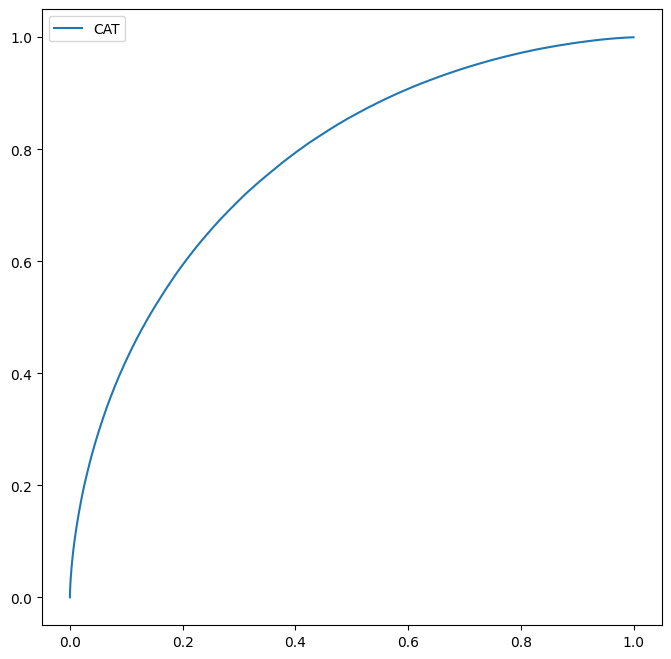

In [32]:
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.plot(fpr, tpr, label='CAT')
ax.legend()
plt.show()

In [33]:
test_pred = cat.predict_proba(X_test_encoded)

sample_submission = pd.read_csv('./data/sample_submission.csv')
sample_submission['Click'] = test_pred[:,1]
sample_submission.to_csv('./data/0520.csv', index=False)

In [34]:
sample_submission

,ID,Click
0,TEST_0000000,0.332274
1,TEST_0000001,0.107967
2,TEST_0000002,0.138830
3,TEST_0000003,0.427498
4,TEST_0000004,0.428678
...,...,...
4538536,TEST_4538536,0.274395
4538537,TEST_4538537,0.354484
4538538,TEST_4538538,0.064057
4538539,TEST_4538539,0.204622
